In [0]:
# перезагрузить ноутбук
!kill -9 -1

# Подготовка аудио файлов (фраз)

Копирование файлов с Git на локальный диск виртуальной машины - вставка ссылки с гитхаба: 

In [1]:
!git clone https://github.com/smartsinovich/Simple-Audio-Recognition.git


Cloning into 'Simple-Audio-Recognition'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 306 (delta 47), reused 34 (delta 12), pack-reused 214
Receiving objects: 100% (306/306), 4.81 MiB | 28.83 MiB/s, done.
Resolving deltas: 100% (92/92), done.


In [2]:
!pip install soundfile

In [3]:
!pip install pydub



---



Number of channels 1
Sample width 2
Frame rate. 16000
Number of frames 48000
parameters: _wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=48000, comptype='NONE', compname='not compressed')
bed_bird_right.wav
16000
[0 0 0 ... 0 0 0]
sound durantion =  3.0


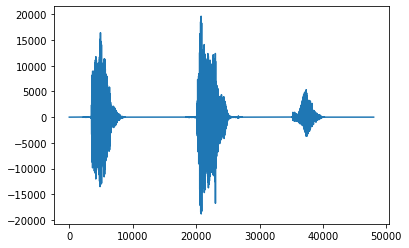

Number of channels 1
Sample width 2
Frame rate. 40
Number of frames 120
parameters: _wave_params(nchannels=1, sampwidth=2, framerate=40, nframes=120, comptype='NONE', compname='not compressed')
seg_bed_bird_right.wav
40
[     0     -8      0      0      0      0      1      0     -8  -6978
   1495  -8190 -11298  -1186   -206   2408   3879    456    478   -377
    -38    -83      0      8      0      0     -4      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      1     -5      0      4    -13     -9      2     -2
     26   2486  -6386   7039   7189   1986  -5409  -2452  -4377   2016
   1257   2213    921    305     -2      0     41      3      0      0
      0      1      2      0      0      0      0      0      0      0
      0      0      0      0      1      0      0      0    103    414
    240     34   -496    434  -2150   -696    828     53     44     48
      0      0      0      6      7      0      5      0      0      4

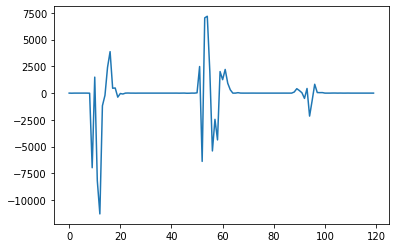

In [5]:
import os
import numpy as np
import keras
import math
from keras.models import load_model
from scipy.io import wavfile
from scipy.fftpack import dct
from scipy.io import wavfile
import scipy.io.wavfile
import matplotlib.pyplot as plt

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#__________для ПОТОКА - готовим файлы для директория  Seg_audio_streams
sample_file ='bed_bird_right.wav'

dir_path = '/content/Simple-Audio-Recognition/Audio_streams'
dir_path_mod = '/content/Simple-Audio-Recognition/Seg_audio_streams'
# если модифицируем файлы для потока - меняются три параметра время,  frame_rate, приставка к имени модифицировнного файла
# заменяем segment = segment.set_frame_rate(40).set_channels(1) frame_rate (c 16000 на 40)
# ставим [:3000] если обрабатывам файлы для потока в двух местах
# заменяем  modified_file = "seg_" + sample_file  в двух местах 
#______________________________________________

#изменяем кол-во каналов до 1 и framerate до 16000, длину сокращаем или дополняем молчанием до 1 сек
from pydub import silence, AudioSegment
audio = AudioSegment.from_file(dir_path + '/' + sample_file, format="wav")


def preprocess_audio(filename):
    # Trim or pad audio segment to 10000ms
   
    
    padding = AudioSegment.silent(duration=3000)          # длина файла, ставим [:3000] если обрабатывам файлы для потока
    segment = AudioSegment.from_wav(filename)[:3000]      # длина файла, ставим [:3000] если обрабатывам файлы для потока
    #padding = AudioSegment.silent(duration=1000)         # ставим [:1000] если обрабатывам raw audio files
    #segment = AudioSegment.from_wav(filename)[:1000]     # ставим [:1000] если обрабатывам raw audio files
    segment = padding.overlay(segment)
    
    # Set frame rate to 16000
    segment = segment.set_frame_rate(40).set_channels(1)      # ставим 40 если обрабатывам файлы для потока
    #segment = segment.set_frame_rate(16000).set_channels(1)  # ставим 16000 если обрабатывам raw audio files

    # Export segment as wav
    modified_file = "seg_" + sample_file    # ставим seg если обрабатывам файлы для потока
    #modified_file = "mod_" + sample_file   # ставим mod если обрабатывам raw audio files
    segment.export(dir_path_mod + '/' + modified_file, format='wav')
    
    
preprocess_audio(dir_path + '/' + sample_file)
modified_file = "seg_" + sample_file    # ставим seg если обрабатывам файлы для потока
#modified_file = "mod_" + sample_file   # ставим mod если обрабатывам raw audio files


import wave
obj = wave.open(dir_path +'/' + sample_file,'r')
print( "Number of channels",obj.getnchannels())
print ( "Sample width",obj.getsampwidth())
print ( "Frame rate.",obj.getframerate())
print ("Number of frames",obj.getnframes())
print ( "parameters:",obj.getparams())
obj.close()
rate, data = scipy.io.wavfile.read(dir_path + '/' + sample_file)
d = obj.getnframes()/obj.getframerate()
print(sample_file)
print(rate)
print(data)
print("sound durantion = ", d)
plt.plot(data)
plt.show()


obj = wave.open(dir_path_mod +'/' + modified_file,'r')
print( "Number of channels",obj.getnchannels())
print ( "Sample width",obj.getsampwidth())
print ( "Frame rate.",obj.getframerate())
print ("Number of frames",obj.getnframes())
print ( "parameters:",obj.getparams())
obj.close()
rate, data = scipy.io.wavfile.read(dir_path_mod + '/' + modified_file)
d = obj.getnframes()/obj.getframerate()
print(modified_file)
print(rate)
print(data)
print("sound durantion = ", d)
plt.plot(data)
plt.show()




---



---

